# Contents
### Importing
### Prep For Algorithms
### Train and Test Split
### Run Artificial Neural network
### Confusion Matrix
### Scaled Data Differences

# Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure
from sklearn.multioutput import MultiOutputClassifier

In [2]:
path = r'C:\Users\rubix\Downloads\Machine Learning 1\02 Data'

In [3]:
df_weather_original = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [4]:
df_pleasant = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

## Data Checks

In [5]:
df_weather_original

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [6]:
df_pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Prep For Algorithms

## Filter Weather Data

In [7]:
# A list of all the strings you want to search for
search_terms = ['GDANSK', 'ROMA', 'TOURS']

# Join the list of terms into a single string for the regex pattern
pattern = '|'.join(search_terms)

# Drop all columns containing any of the terms
df_weather_original_filtered = df_weather_original.drop(df_weather_original.filter(regex=pattern).columns, axis=1)

In [8]:
df_weather_original_filtered.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


# Train and Test Split

In [9]:
#Create an 'X' and y df by dropping the unneeded columns.
X = df_weather_original_filtered.drop(['DATE', 'MONTH'], axis=1)
y = df_pleasant.drop(['DATE'],axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#viewing shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18360, 147)
(4590, 147)
(18360, 15)
(4590, 15)


## Are Datasets the Correct Type (NumPy Array)?

### Define types

In [12]:
def get_data_type(data):
    """Returns a string indicating if the object is a DataFrame, array, or other type."""
    if isinstance(data, pd.DataFrame):
        return "This is a pandas DataFrame."
    elif isinstance(data, np.ndarray):
        return "This is a numpy array."
    else:
        return "This is another type of object."

In [13]:
print(get_data_type(X_train))
print(get_data_type(X_test))
print(get_data_type(y_train))
print(get_data_type(y_test))

This is a pandas DataFrame.
This is a pandas DataFrame.
This is a pandas DataFrame.
This is a pandas DataFrame.


### Answer

Nope. Those need to be changed. The little research I've done says that sklearn can handle dataframes but other "deep learning frameworks" do not and need to be converted to NumPy arrays.

## Converting DataFrame to NumPy Array

In [14]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

### Check

In [15]:
print(get_data_type(X_train))
print(get_data_type(X_test))
print(get_data_type(y_train))
print(get_data_type(y_test))

This is a numpy array.
This is a numpy array.
This is a pandas DataFrame.
This is a pandas DataFrame.


# Run Articifical Neural Network

## Finding the best variables for MLPClassifier

I thought about doing random numbers myself and seeing which ones would get me closer or farther away from training and testing scores, but I figured there must be a way to find those numbers instead of hunting myself. I came across GridSearchCV and that seemed to fit the bill. I used a couple AI tools to refine the reasoning behind using GridSearchCV and what numbers to use to get started.

In [16]:
from sklearn.model_selection import GridSearchCV

# Define model
mlp = MLPClassifier(max_iter=500, tol=0.0001, random_state=42)

# Define search grid
param_grid = {
    'hidden_layer_sizes': [(5,5), (10,10), (20,), (10,5), (50,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Grid search (5-fold cross validation)
grid = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best score: 0.656045751633987


Let's put those results in.

In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50),
                    activation='tanh',
                    solver='adam',
                    max_iter=500,
                    tol=0.001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50), max_iter=500,
              tol=0.001)

## Accuracy Scores

In [18]:
print("Training score:", mlp.score(X_train, y_train))
print("Testing score:", mlp.score(X_test, y_test))

Training score: 0.7386710239651416
Testing score: 0.6982570806100218


# Confusion Matrices

## Define locations for Matrices

In [19]:
locations = list({x.split("_")[0] for x in df_weather_original_filtered.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

## Train Data

In [20]:
y_pred_train = mlp.predict(X_train)

C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


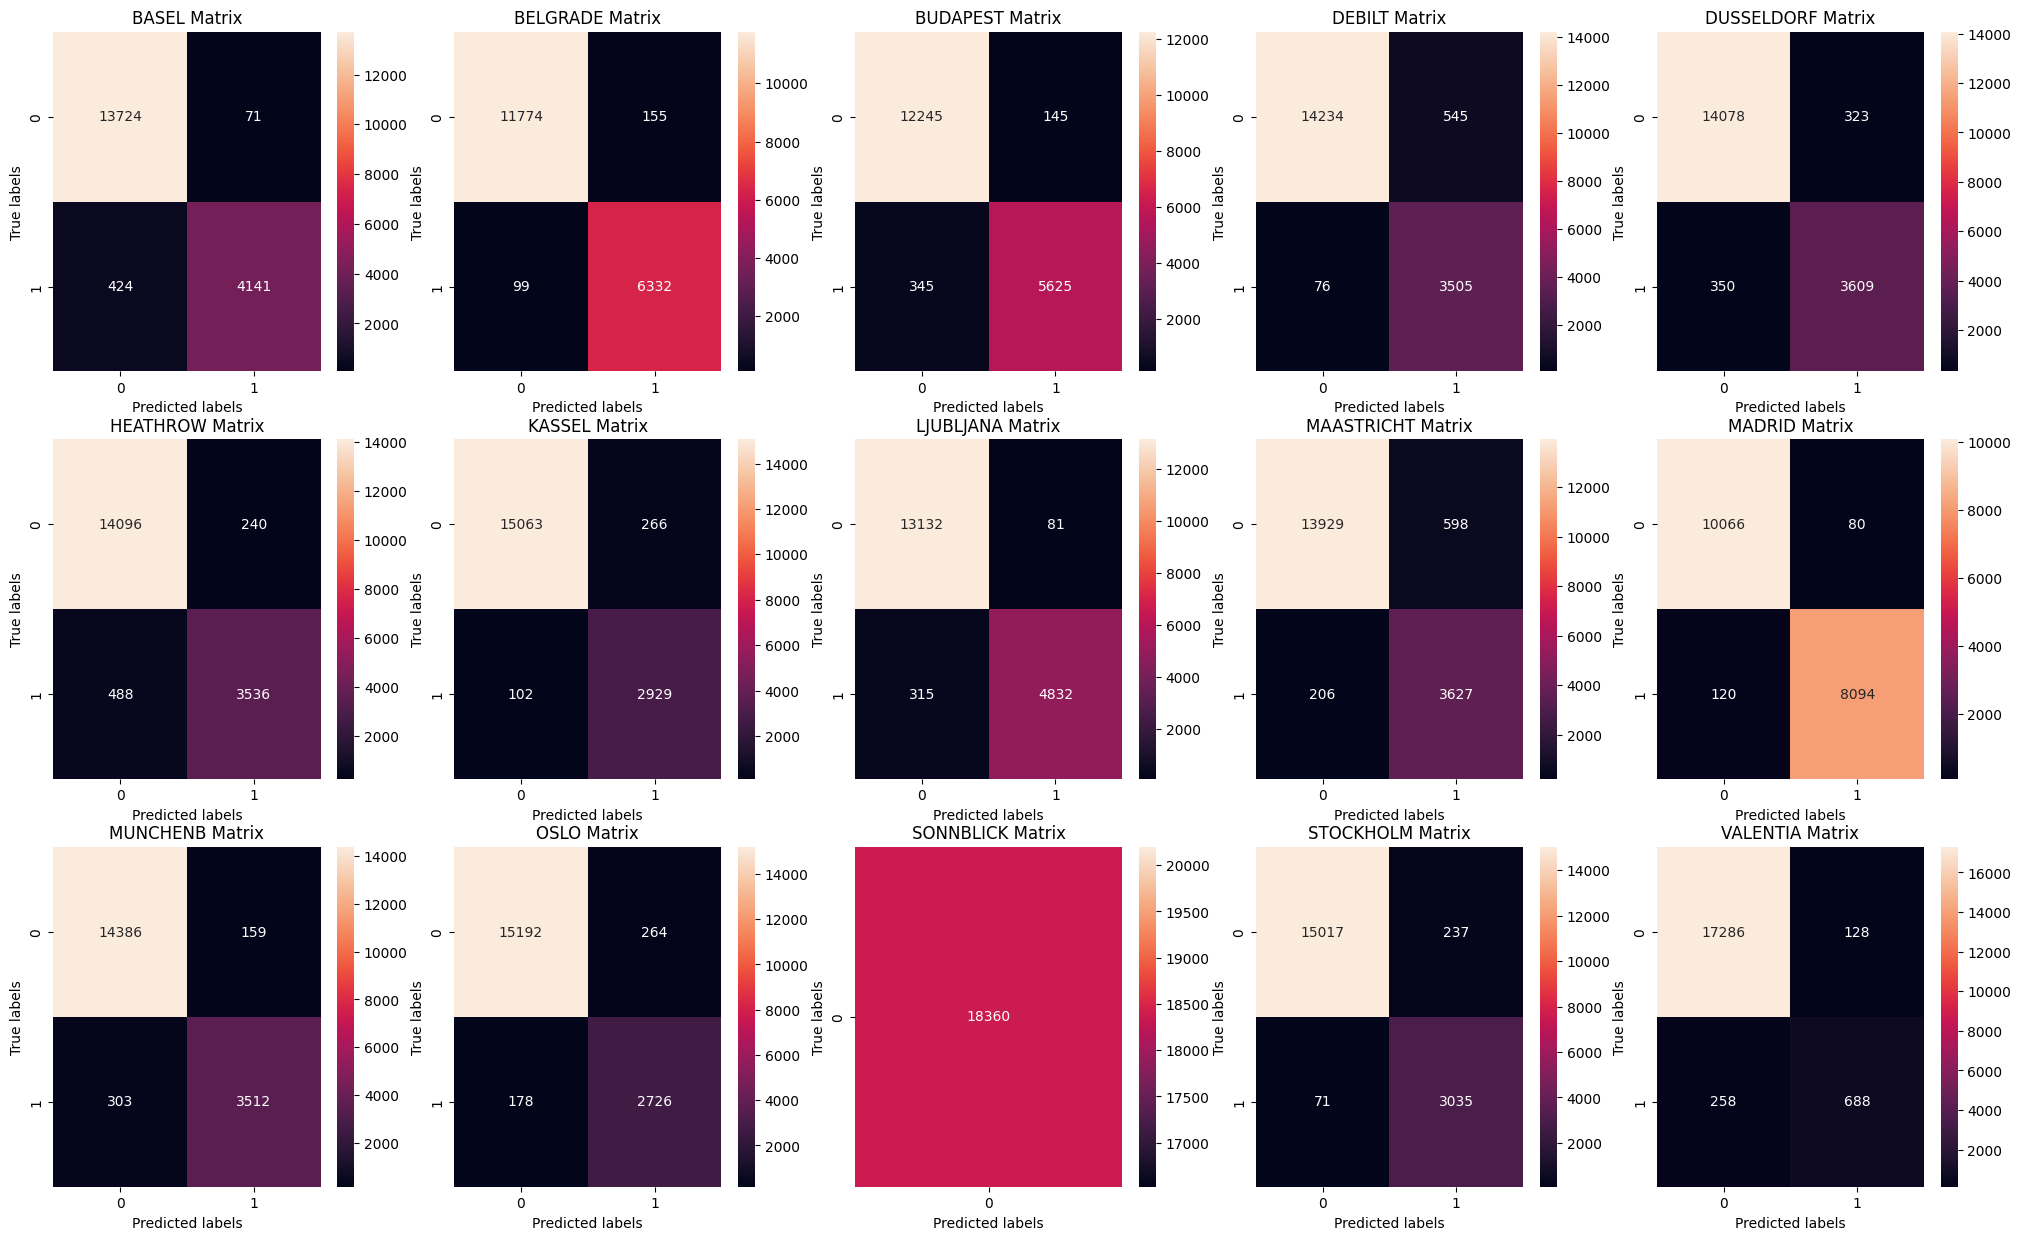

In [21]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [22]:
y_pred = mlp.predict(X_train)
print('Test accuracy score: ',accuracy_score(y_train, y_pred))
multilabel_confusion_matrix(y_train, y_pred)

Test accuracy score:  0.7386710239651416


array([[[13724,    71],
        [  424,  4141]],

       [[11774,   155],
        [   99,  6332]],

       [[12245,   145],
        [  345,  5625]],

       [[14234,   545],
        [   76,  3505]],

       [[14078,   323],
        [  350,  3609]],

       [[14096,   240],
        [  488,  3536]],

       [[15063,   266],
        [  102,  2929]],

       [[13132,    81],
        [  315,  4832]],

       [[13929,   598],
        [  206,  3627]],

       [[10066,    80],
        [  120,  8094]],

       [[14386,   159],
        [  303,  3512]],

       [[15192,   264],
        [  178,  2726]],

       [[18360,     0],
        [    0,     0]],

       [[15017,   237],
        [   71,  3035]],

       [[17286,   128],
        [  258,   688]]])

## Test Data

In [23]:
y_pred_test = mlp.predict(X_test)

C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


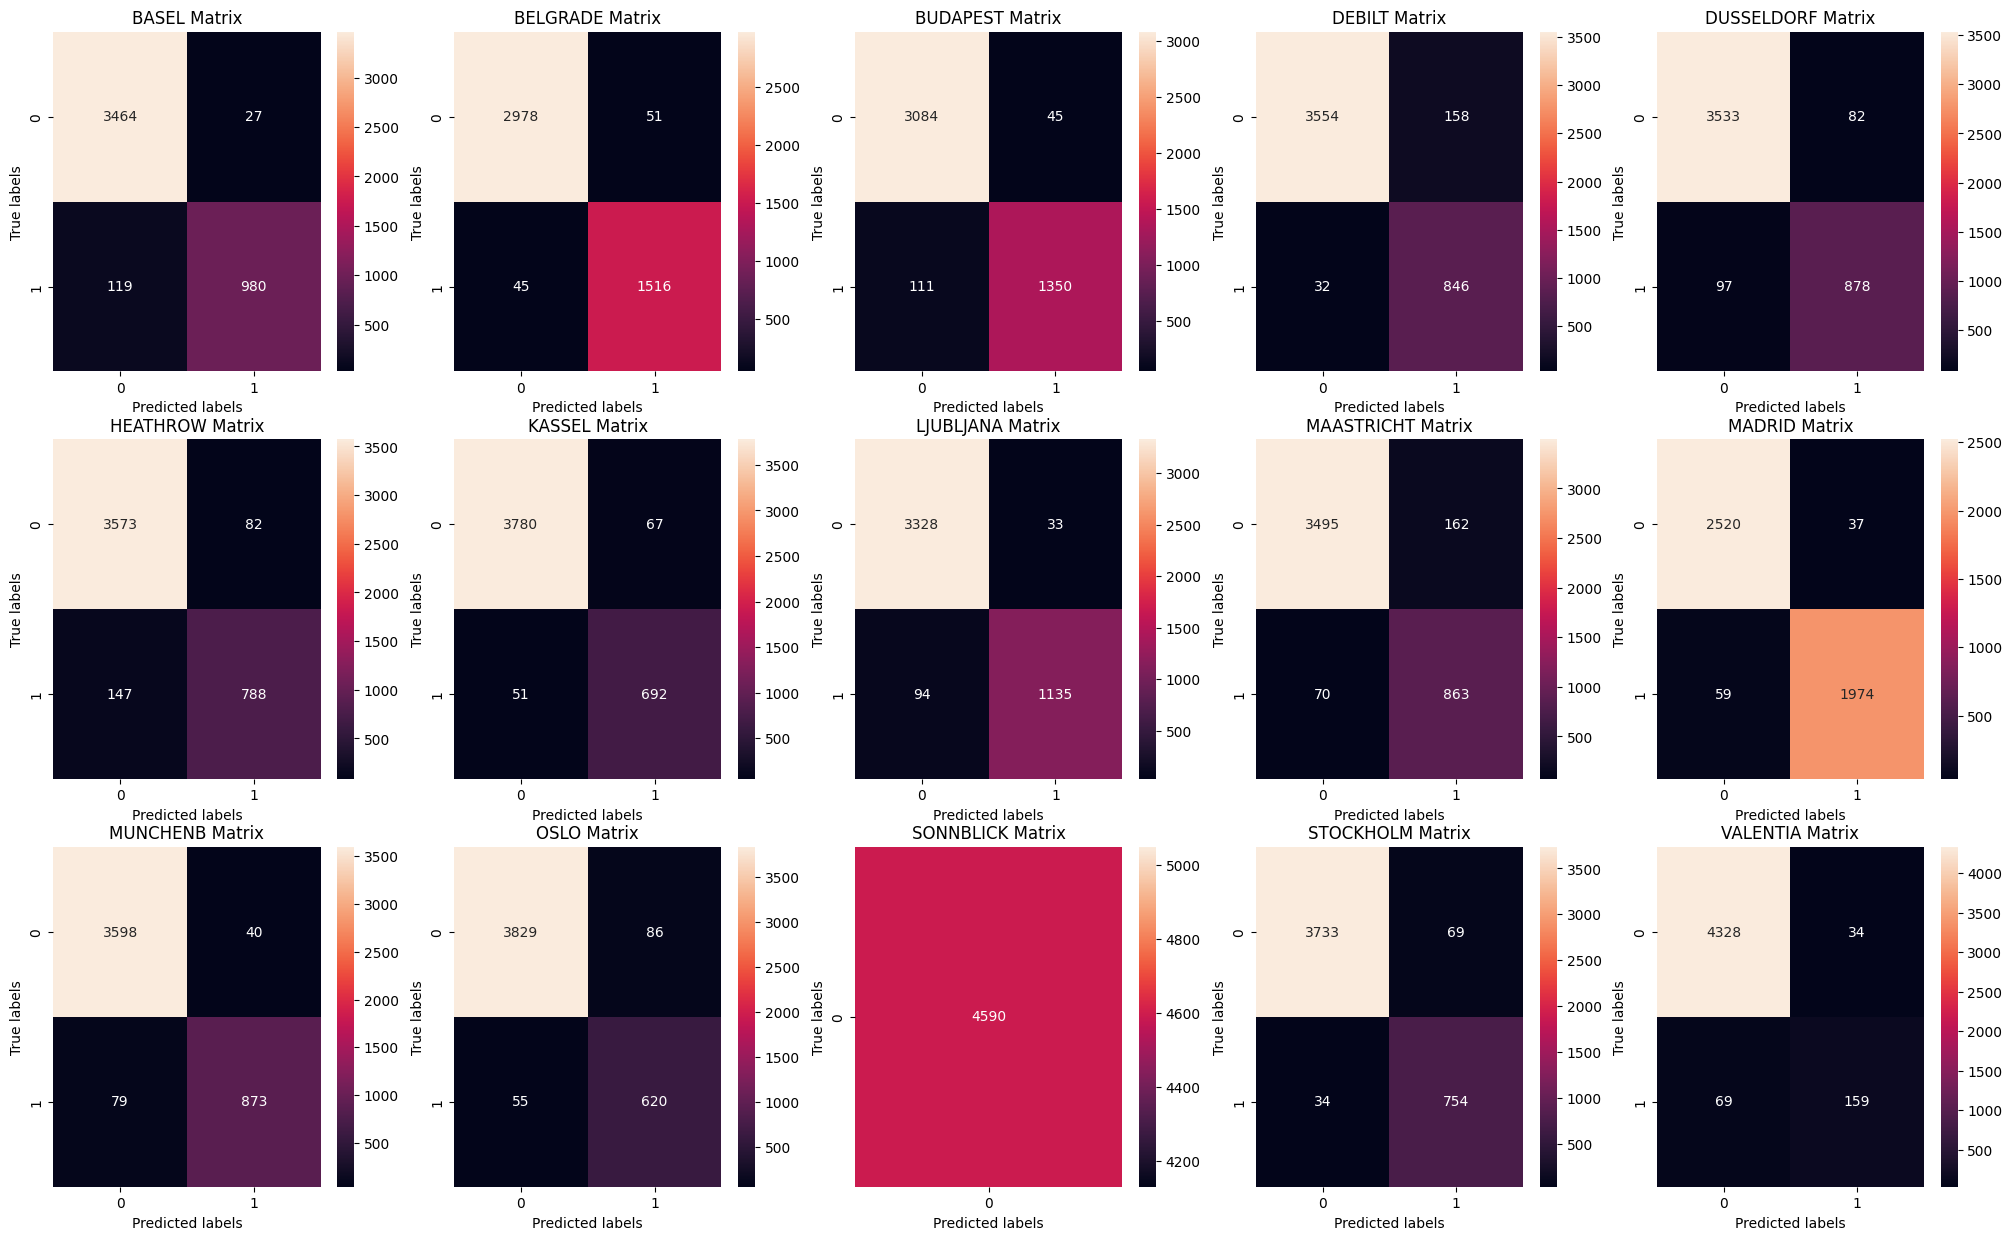

In [24]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [25]:
y_pred = mlp.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.6982570806100218


array([[[3464,   27],
        [ 119,  980]],

       [[2978,   51],
        [  45, 1516]],

       [[3084,   45],
        [ 111, 1350]],

       [[3554,  158],
        [  32,  846]],

       [[3533,   82],
        [  97,  878]],

       [[3573,   82],
        [ 147,  788]],

       [[3780,   67],
        [  51,  692]],

       [[3328,   33],
        [  94, 1135]],

       [[3495,  162],
        [  70,  863]],

       [[2520,   37],
        [  59, 1974]],

       [[3598,   40],
        [  79,  873]],

       [[3829,   86],
        [  55,  620]],

       [[4590,    0],
        [   0,    0]],

       [[3733,   69],
        [  34,  754]],

       [[4328,   34],
        [  69,  159]]])

# Scaled Data Differences

In [26]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform test data
X_test_scaled = scaler.transform(X_test)

## Run tests with scaled data

### Find best hyperparameters

In [27]:
# Define model
mlp = MLPClassifier(max_iter=500, tol=0.0001, random_state=42)

# Define search grid
param_grid = {
    'hidden_layer_sizes': [(5,5), (10,10), (20,), (10,5), (50,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Grid search (5-fold cross validation)
grid = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best score: 0.656045751633987


### Apply parameters

In [28]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50),
                    activation='tanh',
                    solver='adam',
                    max_iter=500,
                    tol=0.001)
#Fit the data to the model
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50), max_iter=500,
              tol=0.001)

### Accuracy Scores

In [29]:
print("Training score:", mlp.score(X_train_scaled, y_train))
print("Testing score:", mlp.score(X_test_scaled, y_test))

Training score: 0.8586601307189542
Testing score: 0.7152505446623094


## Confusion Matrices

### Training Data

C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


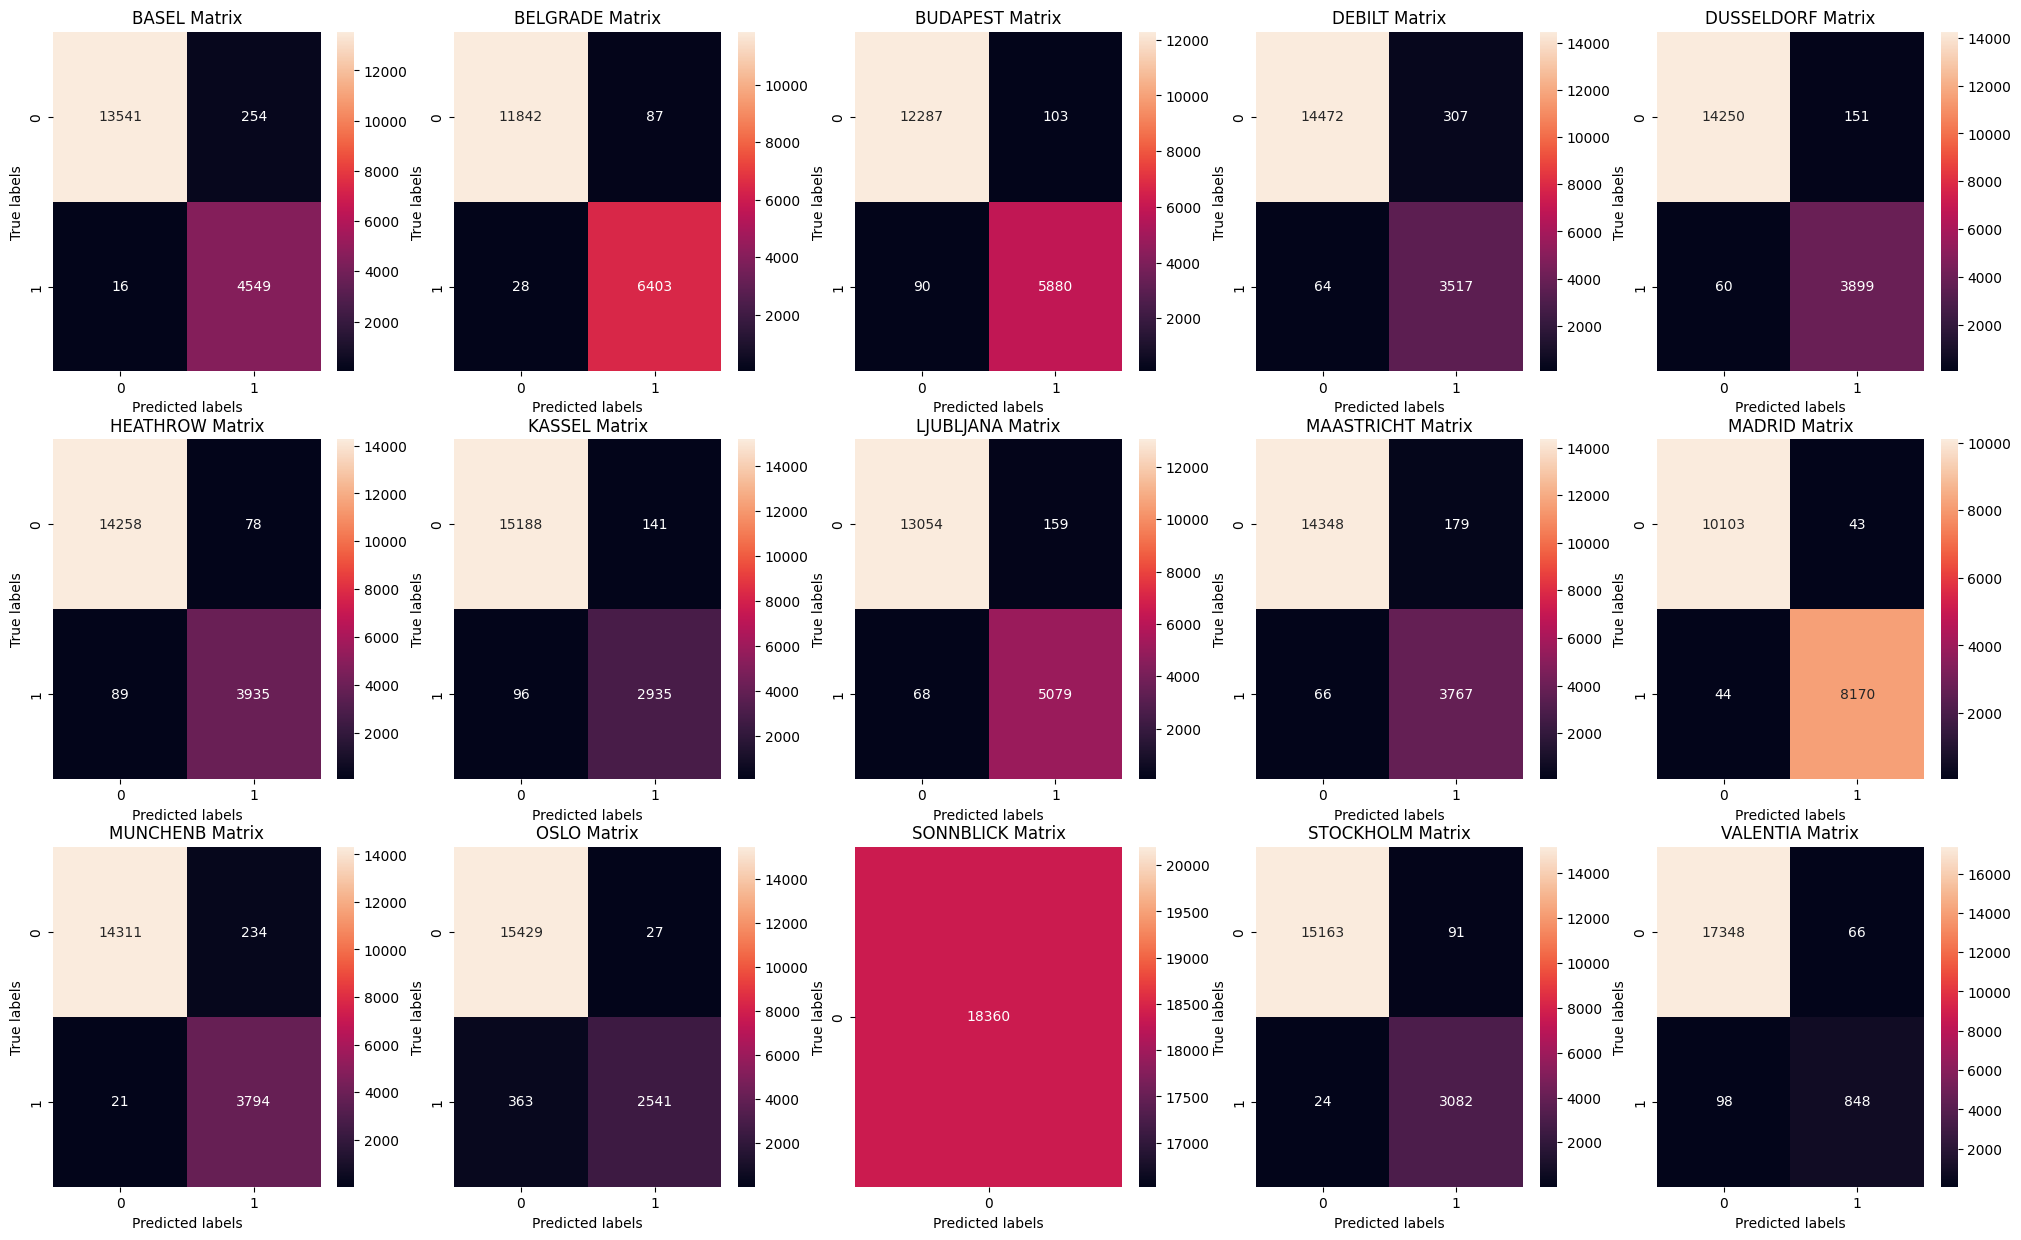

In [30]:
y_pred_train = mlp.predict(X_train_scaled)

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [31]:
y_pred = mlp.predict(X_train_scaled)
print('Test accuracy score: ',accuracy_score(y_train, y_pred))
multilabel_confusion_matrix(y_train, y_pred)

Test accuracy score:  0.8586601307189542


array([[[13541,   254],
        [   16,  4549]],

       [[11842,    87],
        [   28,  6403]],

       [[12287,   103],
        [   90,  5880]],

       [[14472,   307],
        [   64,  3517]],

       [[14250,   151],
        [   60,  3899]],

       [[14258,    78],
        [   89,  3935]],

       [[15188,   141],
        [   96,  2935]],

       [[13054,   159],
        [   68,  5079]],

       [[14348,   179],
        [   66,  3767]],

       [[10103,    43],
        [   44,  8170]],

       [[14311,   234],
        [   21,  3794]],

       [[15429,    27],
        [  363,  2541]],

       [[18360,     0],
        [    0,     0]],

       [[15163,    91],
        [   24,  3082]],

       [[17348,    66],
        [   98,   848]]])

### Testing Data

C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


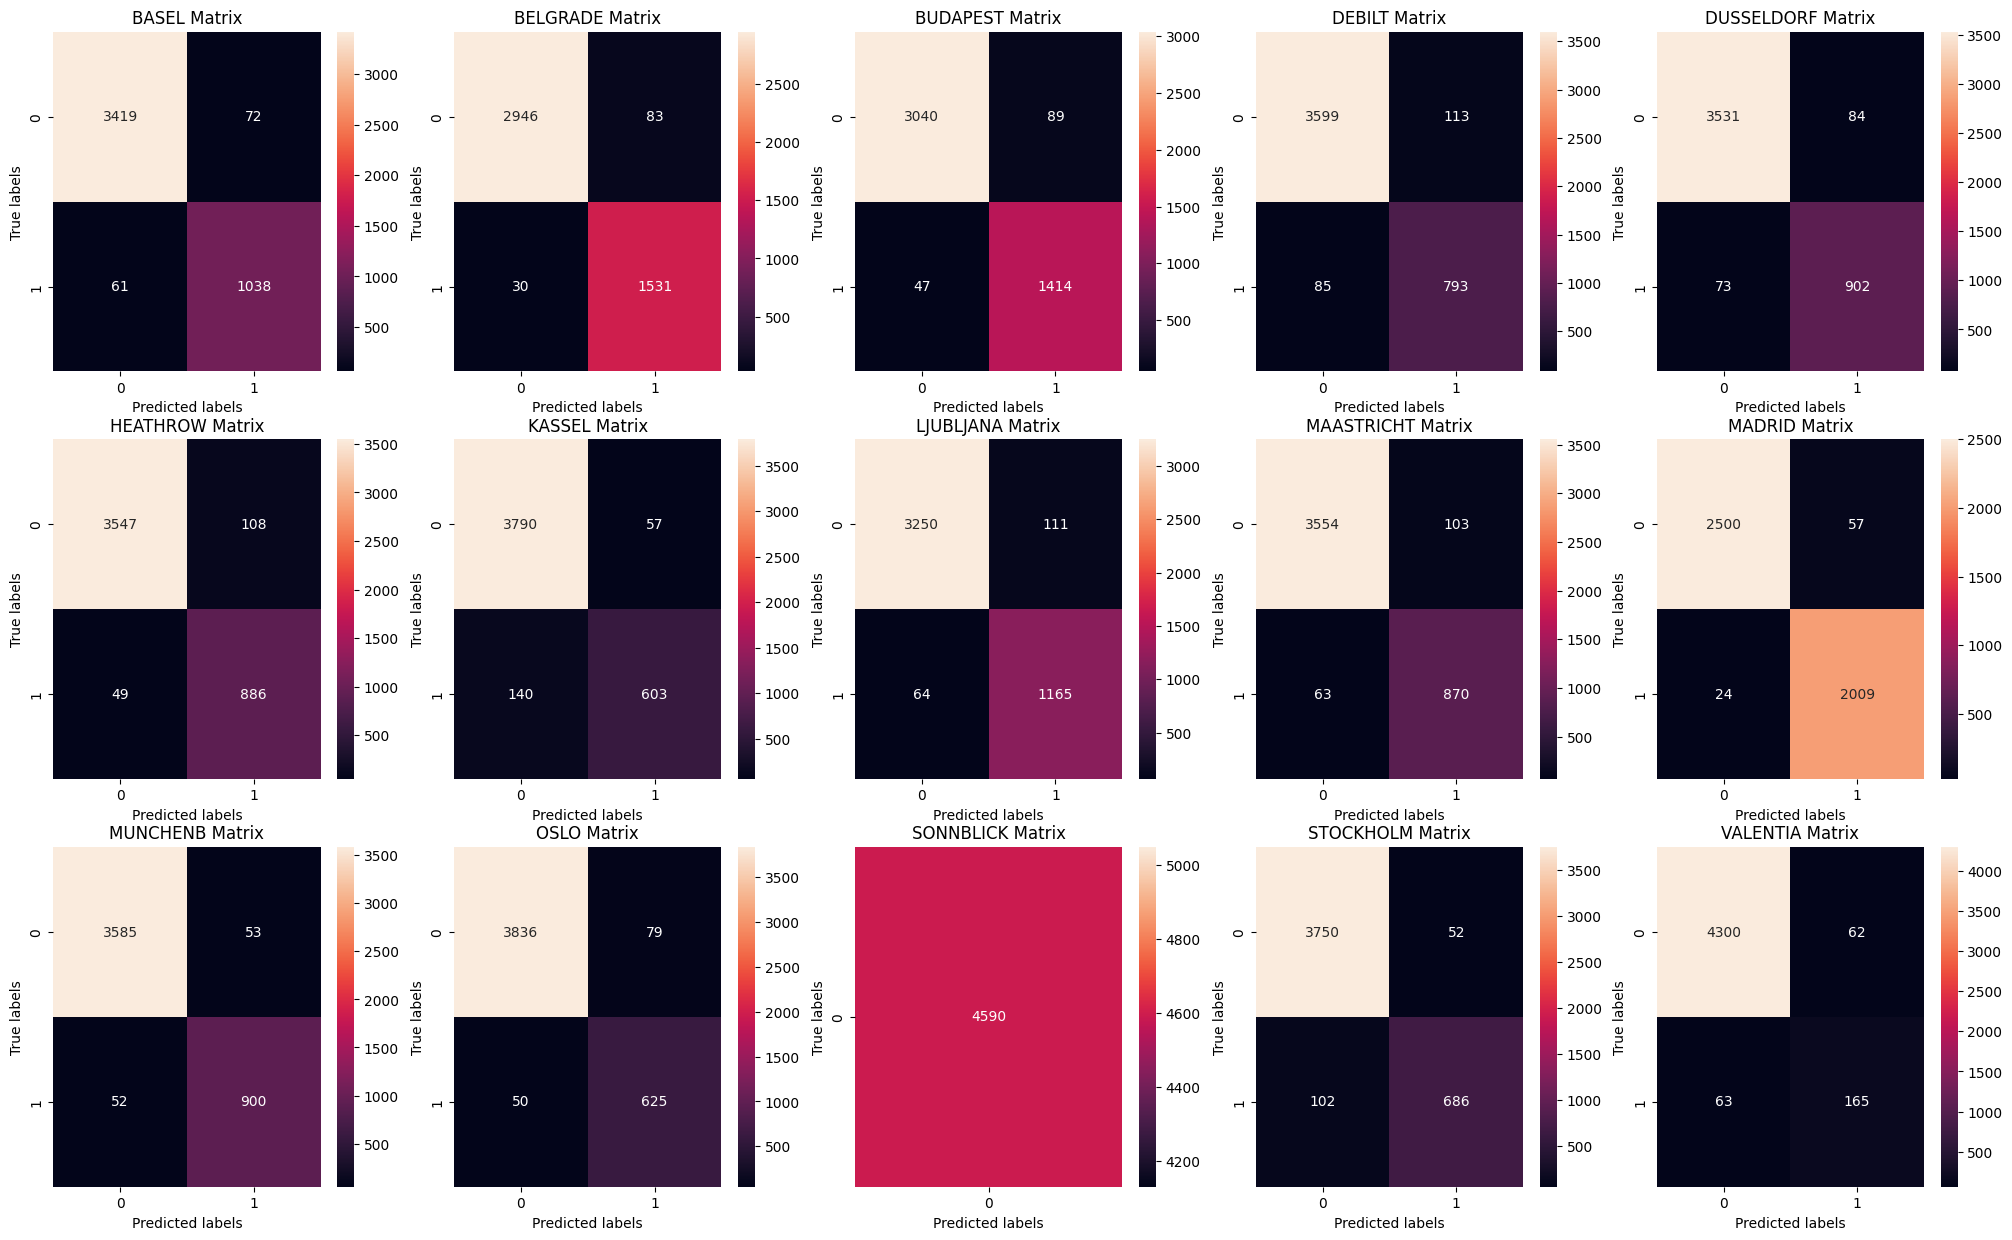

In [32]:
# First, you need to fit the model before making predictions
mlp.fit(X_train_scaled, y_train)  # Add this line to train the model

# Now you can make predictions
y_pred_test = mlp.predict(X_test_scaled)

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [33]:
y_pred = mlp.predict(X_test_scaled)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.7006535947712418


array([[[3419,   72],
        [  61, 1038]],

       [[2946,   83],
        [  30, 1531]],

       [[3040,   89],
        [  47, 1414]],

       [[3599,  113],
        [  85,  793]],

       [[3531,   84],
        [  73,  902]],

       [[3547,  108],
        [  49,  886]],

       [[3790,   57],
        [ 140,  603]],

       [[3250,  111],
        [  64, 1165]],

       [[3554,  103],
        [  63,  870]],

       [[2500,   57],
        [  24, 2009]],

       [[3585,   53],
        [  52,  900]],

       [[3836,   79],
        [  50,  625]],

       [[4590,    0],
        [   0,    0]],

       [[3750,   52],
        [ 102,  686]],

       [[4300,   62],
        [  63,  165]]])

In [37]:
import numpy as np

# This is the array you received from multilabel_confusion_matrix
confusion_matrices = np.array([
    [[3419,   72],
     [  61, 1038]],
    [[2946,   83],
     [  30, 1531]],
    [[3040,   89],
     [  47, 1414]],
    [[3599,  113],
     [  85,  793]],
    [[3531,   84],
     [  73,  902]],
    [[3547,  108],
     [  49,  886]],
    [[3790,   57],
     [ 140,  603]],
    [[3250,  111],
     [  64, 1165]],
    [[3554,  103],
     [  63,  870]],
    [[2500,   57],
     [  24, 2009]],
    [[3585,   53],
     [  52,  900]],
    [[3836,   79],
     [  50,  625]],
    [[4590,    0],
     [   0,    0]],
    [[3750,   52],
     [ 102,  686]],
    [[4300,   62],
     [  63,  165]]
])

# Iterate through each confusion matrix to calculate accuracy
for i, matrix in enumerate(confusion_matrices):
    tn, fp, fn, tp = matrix.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print(f'Accuracy for matrix {i}: {accuracy:.4f}')

# Alternatively, using NumPy's trace and sum functions
print("\n--- Using np.trace and np.sum ---\n")
for i, matrix in enumerate(confusion_matrices):
    accuracy_np = np.trace(matrix) / np.sum(matrix)
    print(f'Accuracy for matrix {i}: {accuracy_np:.4f}')



Accuracy for matrix 0: 0.9710
Accuracy for matrix 1: 0.9754
Accuracy for matrix 2: 0.9704
Accuracy for matrix 3: 0.9569
Accuracy for matrix 4: 0.9658
Accuracy for matrix 5: 0.9658
Accuracy for matrix 6: 0.9571
Accuracy for matrix 7: 0.9619
Accuracy for matrix 8: 0.9638
Accuracy for matrix 9: 0.9824
Accuracy for matrix 10: 0.9771
Accuracy for matrix 11: 0.9719
Accuracy for matrix 12: 1.0000
Accuracy for matrix 13: 0.9664
Accuracy for matrix 14: 0.9728

--- Using np.trace and np.sum ---

Accuracy for matrix 0: 0.9710
Accuracy for matrix 1: 0.9754
Accuracy for matrix 2: 0.9704
Accuracy for matrix 3: 0.9569
Accuracy for matrix 4: 0.9658
Accuracy for matrix 5: 0.9658
Accuracy for matrix 6: 0.9571
Accuracy for matrix 7: 0.9619
Accuracy for matrix 8: 0.9638
Accuracy for matrix 9: 0.9824
Accuracy for matrix 10: 0.9771
Accuracy for matrix 11: 0.9719
Accuracy for matrix 12: 1.0000
Accuracy for matrix 13: 0.9664
Accuracy for matrix 14: 0.9728


In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1099
           1       0.95      0.98      0.96      1561
           2       0.94      0.97      0.95      1461
           3       0.88      0.90      0.89       878
           4       0.91      0.93      0.92       975
           5       0.89      0.95      0.92       935
           6       0.91      0.81      0.86       743
           7       0.91      0.95      0.93      1229
           8       0.89      0.93      0.91       933
           9       0.97      0.99      0.98      2033
          10       0.94      0.95      0.94       952
          11       0.89      0.93      0.91       675
          12       0.00      0.00      0.00         0
          13       0.93      0.87      0.90       788
          14       0.73      0.72      0.73       228

   micro avg       0.92      0.94      0.93     14490
   macro avg       0.85      0.85      0.85     14490
we

C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rubix\anaconda3\Lib\site-package